/var/folders/jv/dvb2597j43z__xg7qnk868880000gn/T/ipykernel_1082/2617236022.py:29: RuntimeWarning: Mean of empty slice
  lh_mean_profile = np.nanmean(lh_subset, axis=(1, 2))  # shape: [80]


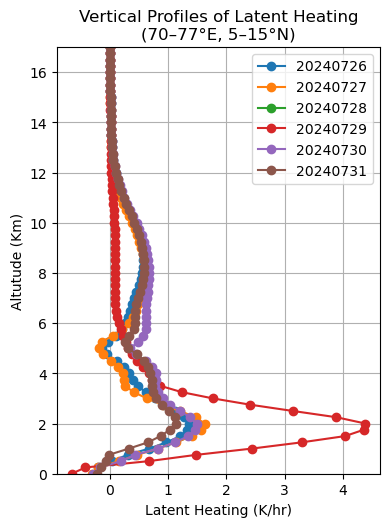

In [1]:
import h5py
import numpy as np
import glob
import matplotlib.pyplot as plt

# Initialize storage list
lh_profiles = []
dates = []
heights = np.linspace(0, 19.750, 80)
# List all HDF5 files
Files = sorted(glob.glob('*.HDF5'))

for file in Files:
    with h5py.File(file, 'r') as f:
        # Load LHCndMean and mask fill values
        lh = f['Grid']['LHCndMean'][:]  # shape = [80, 720, 268]
        lh = np.where(lh == -9999.9, np.nan, lh)

        # Create lat/lon arrays
        lon = np.linspace(-180, 180, 720)
        lat = np.linspace(-67, 67, 268)

        # Index for 73–77°E, 8–13°N
        lon_inds = np.where((lon >= 70) & (lon <= 80))[0]
        lat_inds = np.where((lat >= 5) & (lat <= 15))[0]

        # Subset and average
        lh_subset = lh[:, lon_inds[:, None], lat_inds]
        lh_mean_profile = np.nanmean(lh_subset, axis=(1, 2))  # shape: [80]

        # Store profile and date
        lh_profiles.append(lh_mean_profile)

        # Extract date from filename (assuming consistent naming)
        date_str = file.split('.')[4]  # '20240727' part
        dates.append(date_str[0:8])

# Convert to array for plotting
lh_profiles = np.array(lh_profiles)  # shape: [n_days, 80]
z_levels = np.arange(80)

# Plot
plt.figure(figsize=(4, 5))
for i in range(len(dates)):
    plt.plot(lh_profiles[i], heights,marker='o')
#plt.gca().invert_yaxis()
plt.xlabel("Latent Heating (K/hr)")
plt.ylabel("Altutude (Km)")
plt.legend(dates, loc="upper right")
plt.ylim([0,17])
plt.grid(True)
plt.tight_layout()
plt.title("Vertical Profiles of Latent Heating\n(70–77°E, 5–15°N)")
plt.savefig("Vertical Profiles of Latent Heating.png", dpi=300, bbox_inches='tight')


/var/folders/jv/dvb2597j43z__xg7qnk868880000gn/T/ipykernel_1068/155918756.py:28: RuntimeWarning: Mean of empty slice
  lh_mean_profile = np.nanmean(lh_subset, axis=(1, 2))


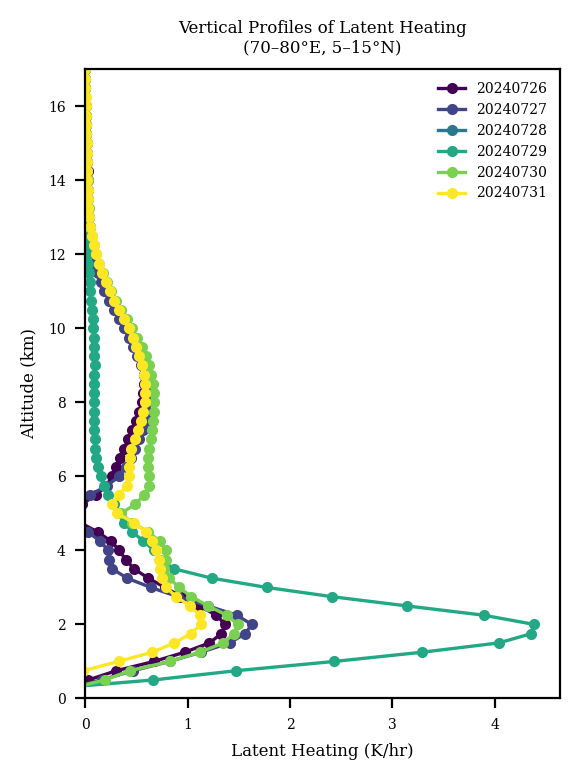

In [74]:
import h5py
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from cycler import cycler

# Initialize storage list
lh_profiles = []
dates = []
heights = np.linspace(0, 19.750, 80)

# List all HDF5 files
Files = sorted(glob.glob('*.HDF5'))

for file in Files:a
    with h5py.File(file, 'r') as f:
        lh = f['Grid']['LHCndMean'][:]  # [80, 720, 268]
        lh = np.where(lh == -9999.9, np.nan, lh)

        lon = np.linspace(-180, 180, 720)
        lat = np.linspace(-67, 67, 268)

        lon_inds = np.where((lon >= 70) & (lon <= 80))[0]
        lat_inds = np.where((lat >= 5) & (lat <= 15))[0]

        lh_subset = lh[:, lon_inds[:, None], lat_inds]
        lh_mean_profile = np.nanmean(lh_subset, axis=(1, 2))

        lh_profiles.append(lh_mean_profile)

        date_str = file.split('.')[4]
        dates.append(date_str[:8])

# Convert to array
lh_profiles = np.array(lh_profiles)

# Plot setup
plt.figure(figsize=(3, 4), dpi=200)
plt.rcParams.update({
    "font.size": 10,
    "font.family": "serif",
    "axes.labelsize": 6,
    "axes.titlesize": 6,
    "legend.fontsize": 5,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5
})

# Color cycle
colors = plt.cm.viridis(np.linspace(0, 1, len(dates)))
plt.gca().set_prop_cycle(cycler(color=colors))

# Plot each profile
for i in range(len(dates)):
    plt.plot(lh_profiles[i], heights, marker='o', label=dates[i], linewidth=1.2, markersize=3)

# Axis setup
plt.xlabel("Latent Heating (K/hr)")
plt.ylabel("Altitude (km)")
plt.title("Vertical Profiles of Latent Heating\n(70–80°E, 5–15°N)")
plt.ylim(0, 17)
plt.xlim(left=0)
#plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.9)
#plt.minorticks_on()
plt.legend(loc="upper right", frameon=False, ncol=1)
plt.tight_layout()

# Save figure
plt.savefig("Vertical_Profiles_of_Latent_Heating.png", dpi=300, bbox_inches='tight')
plt.show()


In [3]:
import pandas as pd

# Convert profiles to DataFrame
df = pd.DataFrame(lh_profiles.T, columns=dates)
df.insert(0, 'Height_km', heights)

# Save to CSV
df.to_csv('Latent_Heating_Profiles.csv', index=False)